# Introduction to plotting

* **Products used:** 
landsat_sr_kenya

* **Prerequisites:** Users of this notebook should have a basic understanding of:
    * Introduction to Datacube
    * Products and measurements
    * Loading data

## Background
Data visualisation is an important component of working with Earth Observation data.
The `xarray` Python package provides a range of straightforward data plotting options which allow users to quickly generate simple plots from multi-dimensional datasets. 
To generate more complex and informative plots from data loaded from Kenya Space Agency Datacube, the KSA Notebooks repository also provides a custom plotting module with additional easy-to-use functionality.

## Description
This introductory notebook demonstrates how to visualise Kenya Space Agency satellite data returned from running a datacube query.
The notebook demonstrates commonly-used `xarray` plotting methods, as well as custom functions provided in `deafrica_tools.plotting`.

Topics covered in this notebook include:

* View your area of interest prior to querying the datacube
* Querying the datacube and loading data
* Plotting single band data (e.g. a single satellite band)
    * Selecting and plotting individual timesteps
    * Plotting multiple timesteps
    * Customising plot appearance
* Plotting three-band true or false colour imagery
    * Plotting single timesteps
    * Plotting multiple timesteps
    * Customising plot appearance

***

## Getting started
To run this introduction to plotting data loaded from the datacube, run all the cells in the notebook starting with the "Load packages" cell. 

### Load packages
First we run `%matplotlib inline`, which ensures figures plot correctly in the Jupyter notebook.

We then need to load the `datacube` package, which allows us to load data. 

Plotting the data requires functions which we can import from `dea_tools.plotting`. For this notebook, we need `rgb` and `display_map`. We can import both in one line by separating the names with a comma.

In [3]:
# Supress Warning 
import warnings
warnings.filterwarnings('ignore')

In [4]:
%matplotlib inline
import datacube
from utils.dea_tools.plotting import display_map,rgb

ModuleNotFoundError: No module named 'utils'

### Connect to the datacube
We then connect to the datacube database so we can load KSA data. 

In [6]:
dc = datacube.Datacube(app="Plotting",config = '/etc/datacube.conf')

### Analysis parameters

The following variables are required to establish a query for this notebook:
- `lat_range`: The latitude range to analyse. 
- `lon_range`: The longitude range to analyse.
- `time_range`: The date range to analyse (e.g. `("2017-01-01", "2017-03-30")`).

In [88]:
lat_range = (-0.5239, -0.2657)
lon_range = (36.2581, 35.982)
time_range = ("2020-01-01", "2020-03-30")

## View the queried location
Before running a query and extracting and analysing data, it is useful to double-check that your location is correct.
The `display_map()` function shows your selected area as a red rectangle on an interactive map.
Clicking on any point of the map will reveal the latitude and longitude coordinates of that point.

In [94]:
display_map(x=lon_range,y=lat_range)

## Query and view data
The variables determined above are used here to query the datacube using the `dc.load()` function and load data introduced in the [Loading data notebook](03_Loading_data.ipynb).
This notebook uses Landsat 8 Surface reflectance `landsat_sr_kenya`.

In [89]:
ds = dc.load(product="landsat_sr_kenya",
             measurements=['blue','green','red','nir'],
             x=lon_range,
             y=lat_range,
             time=time_range,
             output_crs='EPSG:4326',
             resolution= (-0.00027, 0.00027))

print(ds)

<xarray.Dataset>
Dimensions:      (time: 5, latitude: 957, longitude: 1024)
Coordinates:
  * time         (time) datetime64[ns] 2020-03-14T07:48:49.984619 ... 2020-03...
  * latitude     (latitude) float64 -0.2658 -0.2661 -0.2664 ... -0.5237 -0.5239
  * longitude    (longitude) float64 35.98 35.98 35.98 ... 36.26 36.26 36.26
    spatial_ref  int32 4326
Data variables:
    blue         (time, latitude, longitude) uint16 8159 8296 8510 ... 0 0 0
    green        (time, latitude, longitude) uint16 9539 9877 10005 ... 0 0 0
    red          (time, latitude, longitude) uint16 9052 9400 9530 ... 0 0 0
    nir          (time, latitude, longitude) uint16 20854 21311 20983 ... 0 0 0
Attributes:
    crs:           EPSG:4326
    grid_mapping:  spatial_ref


## Plotting single band images

The `xarray` package provides built-in methods for plotting individual data variables or measurements.
For example, we might want to make a plot for a single measurement like the `red` satellite band in the data we loaded above.

To do this, we first need to access the band we are after as an `xarray.DataArray` 

In [90]:
print(ds.nir)

<xarray.DataArray 'nir' (time: 5, latitude: 957, longitude: 1024)>
array([[[20854, 21311, 20983, ..., 13145, 13691, 15541],
        [19655, 20183, 20895, ..., 14121, 15258, 16922],
        [19517, 19367, 19673, ..., 15681, 16372, 18478],
        ...,
        [16909, 16200, 16207, ..., 16327, 16727, 16991],
        [17514, 16656, 15570, ..., 16313, 17002, 16811],
        [19176, 14957, 15336, ..., 16313, 17002, 16811]],

       [[    0,     0,     0, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0,     0,     0],
        ...,
        [    0,     0,     0, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0,     0,     0]],

       [[    0,     0,     0, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0,     0,     0],
        ...,
        [    0,     0,     0, ..., 

You can see in the object header that this `xarray.DataArray` has data for thirteen timesteps <xarray.DataArray 'nir' (time: 13, latitude: 1, longitude: 1)>.
To make a plot for a single timestep only, we need to select it using one of the following options:

1. `.isel()`: This stands for "index selection", and lets us easily select individual timesteps from a dataset by providing the number of the observation we want. 
Counting in Python begins at 0, so to select the first timestep in the `xarray.DataArray` we can specify `.isel(time=0)`:

In [109]:
first_timestep = ds.nir.isel(time=3)

print(first_timestep)

<xarray.DataArray 'nir' (latitude: 957, longitude: 1024)>
array([[19258, 19971, 19870, ..., 14813, 15228, 16706],
       [18522, 18424, 19054, ..., 15020, 14961, 14833],
       [18110, 17979, 18318, ..., 15127, 14695, 15509],
       ...,
       [15304, 16017, 16315, ..., 16062, 16293, 16486],
       [15899, 16066, 16161, ..., 15833, 16517, 16089],
       [18548, 14352, 15482, ..., 15833, 16517, 16089]], dtype=uint16)
Coordinates:
    time         datetime64[ns] 2020-03-30T07:48:40.858400
  * latitude     (latitude) float64 -0.2658 -0.2661 -0.2664 ... -0.5237 -0.5239
  * longitude    (longitude) float64 35.98 35.98 35.98 ... 36.26 36.26 36.26
    spatial_ref  int32 4326
Attributes:
    units:         1
    nodata:        0
    crs:           EPSG:4326
    grid_mapping:  spatial_ref


2. `.sel()`: This allows us to select data using real-world coordinate labels like `time`. 
    For example, from the *Coordinates* section, we can select the first timestep (i.e. The observation for January 6th 2017) from the `xarray.DataArray` by specifying `.sel(time='2017-02-01')`:

In [85]:
first_timestep_1 = ds.red.sel(time='2017-02-01')

print(first_timestep_1)

<xarray.DataArray 'red' (time: 0, y: 954, x: 1026)>
array([], shape=(0, 954, 1026), dtype=uint16)
Coordinates:
  * time         (time) datetime64[ns] 
  * y            (y) float64 9.971e+06 9.971e+06 ... 9.942e+06 9.942e+06
  * x            (x) float64 1.639e+05 1.64e+05 1.64e+05 ... 1.947e+05 1.947e+05
    spatial_ref  int32 21037
Attributes:
    units:         1
    nodata:        0
    crs:           EPSG:21037
    grid_mapping:  spatial_ref


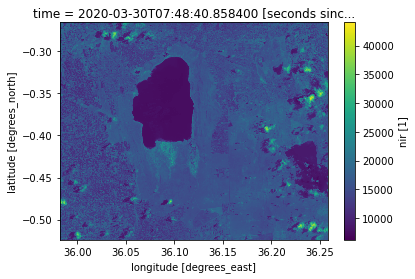

In [110]:
first_timestep.plot()

### Plotting multiple timesteps
It is often useful to produce plots for a single measurement across time, for example to compare change between satellite observations or summary datasets.
To plot multiple images, we can skip the `isel()` step above and plot the entire `xarray.DataArray` directly. 

To plot multiple timesteps in one figure, we need to tell the `.plot()` function to put each timestep in a different column.
We can do this by specifying `.plot(col="time")`:

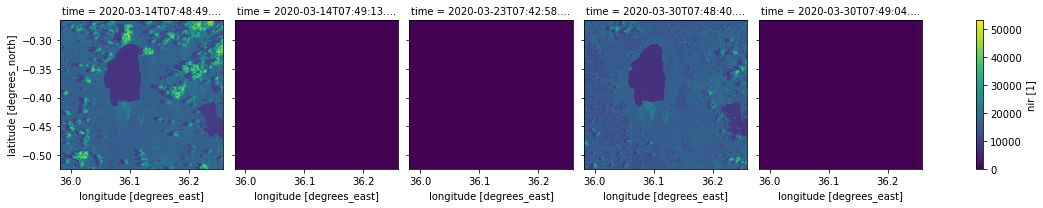

In [106]:
ds.nir.plot(col="time")

### Customising plot appearance
You may notice that the plots above are dark and difficult to see clearly.
To improve the appearance of `xarray` plots, you can use the `robust=True` argument to optimise the plot colours by clipping extreme values or outliers. 
This will use the 2nd and 98th percentiles of the data to compute the color limits:

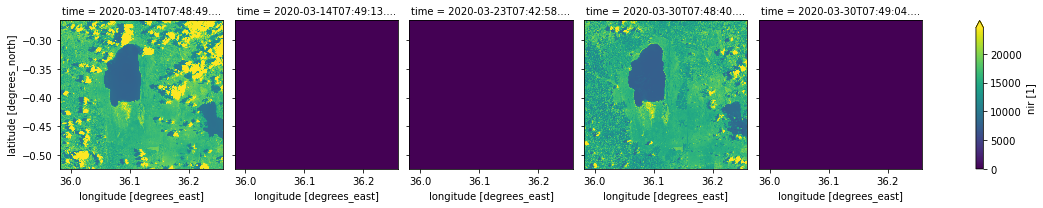

In [108]:
ds.nir.plot(col="time", robust=True)

We can also easily use custom colour maps/styles to visualise our data using the `cmap` parameter.

When choosing a colour map for a plot, it is important to choose a set of colours that are perceived logically by the human eye. 
The best colour maps are "perceptually uniform": these colour maps increase logically from dark to light colours, where equal increases in lightness/darkness correspond to equal changes in data values. 
Some best-practice perceptually uniform colour maps include:

```
"viridis", "plasma", "inferno", "magma", "cividis"
```

It is also important to consider colour blindness when selecting a colour map. 
`xarray` supports many colour maps from the "colorbrewer" family of colour maps which are optimised for colour blindness.
You can use the interactive [online tool](http://colorbrewer2.org) to browse all available colour maps, or choose from one of the following commonly used options:

```
"Greys", "Purples", "Blues", "Greens", "Oranges", "Reds",
"YlOrBr", "YlOrRd", "OrRd", "PuRd", "RdPu", "BuPu", 
"GnBu", "PuBu", "YlGnBu", "PuBuGn", "BuGn", "YlGn"
```

For a full list of available colour maps you can refer to [this list](https://matplotlib.org/stable/tutorials/colors/colormaps.html).

For example, to plot our data with the perceptually uniform `magma` colour map:

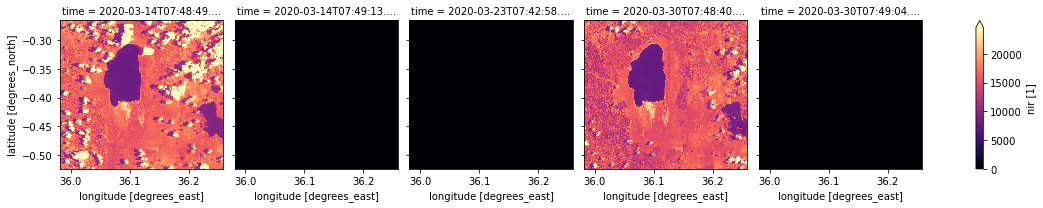

In [113]:
ds.nir.plot(col="time", robust=True, cmap="magma")

## Plotting true or false colour RGB images

Although `xarray` makes it easy to plot single band images, plotting a three band colour photo-like image is less straightforward.

The `rgb()` function maps three data variables/measurements from the loaded dataset to the red, green and blue channels that are used to make a three-colour image.

Providing the `red`, `green` and `blue` measurements from a dataset will produce a true colour image (akin to how humans view the landscape).
Providing `nir`, `red` and `green` measurements or any other set of three satellite bands from a dataset will produce a false colour image. 

Hence, the `rgb()` function can be used to visualise the data returned by a query.
It requires the minimum input of:

* `ds:` The `xarray.Dataset` object
* `bands:` Three bands for display (these must be measurements found in the dataset) 
* `index:` The timestep to view, default is `0`

### Plotting a single timestep

The time dimension of your `xarray.Dataset` describes how many timesteps exist for your location during your nominated time period.
In the `rgb()` function, the `index` variable is asking for which timestep you want to view (similar to the `isel()` example above).
Remember: counting in Python begins at 0 so to view the earliest timestep set `index=0`:

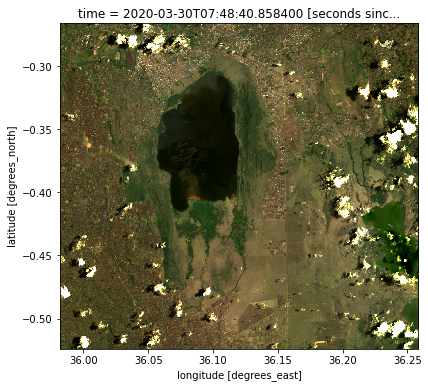

In [105]:
rgb(ds,bands=['red','green','blue'],index=3,robust=True)

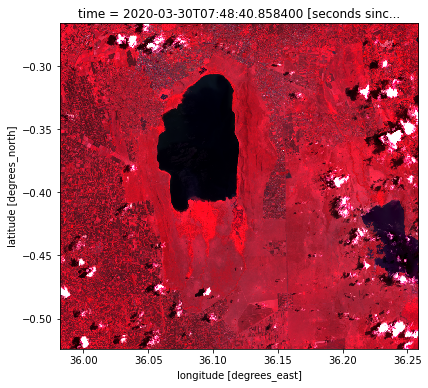

In [117]:
rgb(ds,bands=['nir','blue','green'],index=3,robust=True)

### Plotting multiple timesteps
As discussed in the single band example above(#Plotting-multiple-timesteps), it can be useful to visualise multiple timesteps in a single plot (e.g. to compare change over time).

The `rgb()` function allows you to do this by providing a list of multiple images to plot using `index=[X, X, ...]`.
For example, we can plot the first and fifth image in our dataset using `index=[0, 4]` (remembering that counting in Python starts at 0):

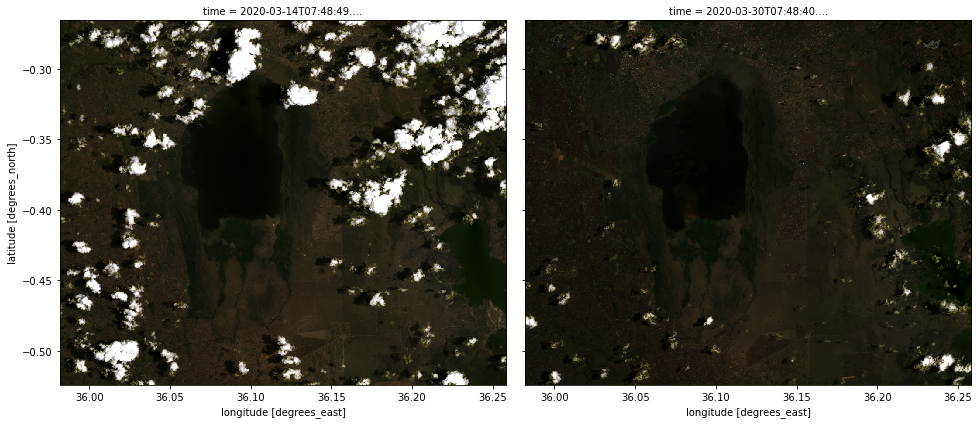

In [126]:
rgb(ds,bands=['red','green','blue'],index=[0,3], robust = True)